<a href="https://colab.research.google.com/github/Sj-kronton/Fotos_AI/blob/main/K-vecinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Algoritmo de proximidad de vecinos: K-vecinos mas cercanos

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

creditos= pd.read_csv('creditos.csv')
creditos.head()

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0


In [3]:
buenos=creditos[creditos["cumplio"]==1]
malos=creditos[creditos["cumplio"]==0]
buenos, malos

(     edad  credito  cumplio
 1      19   477965        1
 6      23   583565        1
 7      24   100000        1
 8      24   199272        1
 13     25   195341        1
 ..    ...      ...      ...
 187    51   354045        1
 188    51   379188        1
 189    51   396544        1
 190    52   100000        1
 192    53   130475        1
 
 [167 rows x 3 columns],
      edad  credito  cumplio
 0      18   363112        0
 2      20   239072        0
 3      22   195265        0
 4      22   482174        0
 5      23   468815        0
 9      24   246195        0
 10     24   433444        0
 11     25   100000        0
 12     25   161474        0
 40     28   432323        0
 53     29   590394        0
 54     29   595997        0
 56     30   157157        0
 64     31   173752        0
 78     32   588455        0
 93     35   521187        0
 97     36   568053        0
 98     37   299154        0
 113    40   100000        0
 118    40   459974        0
 135    43   498

##analizar datos con grafica

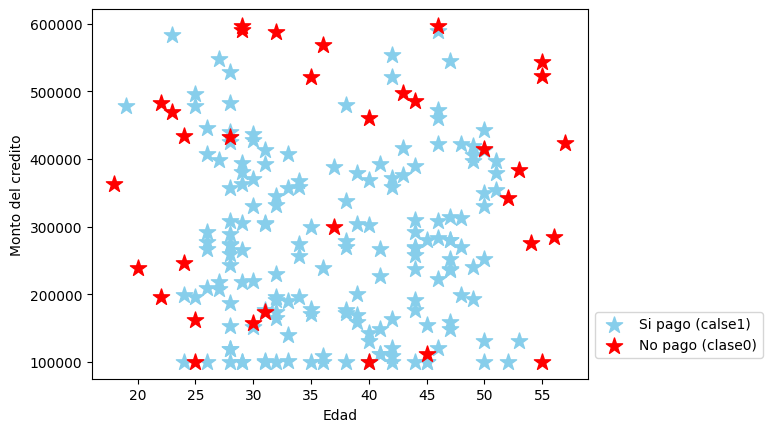

In [4]:
plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue",
            label="Si pago (calse1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red",
            label="No pago (clase0)")

plt.ylabel("Monto del credito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

In [5]:
datos= creditos[["edad", "credito"]]
clase= creditos["cumplio"]

escalador= preprocessing.MinMaxScaler()

datos= escalador.fit_transform(datos)
datos
#las edades se organizan en porcentaje de 100%, repartiendose entre 0 y 1,
#de forma que 18 años es el minimo y es 0

array([[0.        , 0.52964444],
       [0.02564103, 0.76084353],
       [0.05128205, 0.27995193],
       [0.1025641 , 0.19176844],
       [0.1025641 , 0.76931624],
       [0.12820513, 0.74242458],
       [0.12820513, 0.97341632],
       [0.15384615, 0.        ],
       [0.15384615, 0.19983453],
       [0.15384615, 0.29429053],
       [0.15384615, 0.67122276],
       [0.17948718, 0.        ],
       [0.17948718, 0.12374716],
       [0.17948718, 0.19192143],
       [0.17948718, 0.76130249],
       [0.17948718, 0.79673129],
       [0.20512821, 0.        ],
       [0.20512821, 0.21862589],
       [0.20512821, 0.33577846],
       [0.20512821, 0.35571521],
       [0.20512821, 0.38628463],
       [0.20512821, 0.61926119],
       [0.20512821, 0.69480706],
       [0.23076923, 0.21664509],
       [0.23076923, 0.23805134],
       [0.23076923, 0.60140789],
       [0.23076923, 0.90058196],
       [0.25641026, 0.        ],
       [0.25641026, 0.03816245],
       [0.25641026, 0.03904616],
       [0.

##creacion modelo de clasificacion por vecinos

In [6]:
clasificador= KNeighborsClassifier(n_neighbors=3)#vecinos a tomar en cuenta, por ahora 3
clasificador.fit(datos, clase)
#aqui se cambia luego a por ejecplo raiz cuadrada de total de datos (200)


KNeighborsClassifier(n_neighbors=3)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Clase  [1]
Probabilidades con clase  [[0. 1.]]


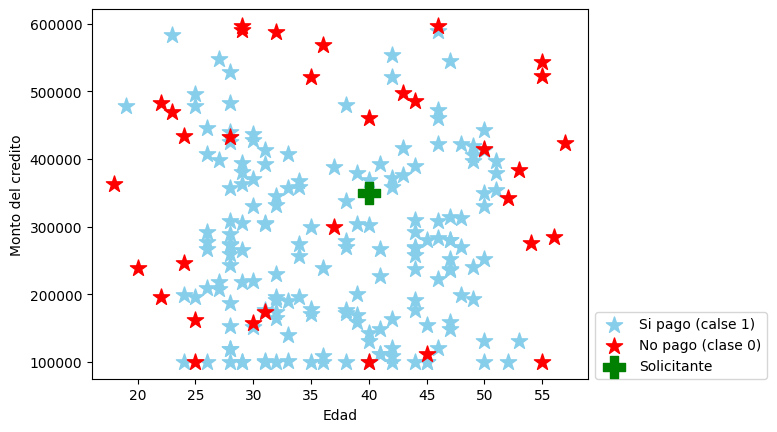

In [7]:
edad=40 #datos artificial para probar el modelo
monto=350000

#escalar datos del nuevo solicitante
solicitante=escalador.transform([[edad, monto]])
print("Clase ", clasificador.predict(solicitante))
print("Probabilidades con clase ", clasificador.predict_proba(solicitante))#calcular clase y probabilidades

#codigo para graficar

plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue",
            label="Si pago (calse 1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red",
            label="No pago (clase 0)")

plt.scatter(edad, monto, marker="P", s=250, color="green", label="Solicitante")
plt.ylabel("Monto del credito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

##Regiones de las clases

Pagadores vs deudores

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


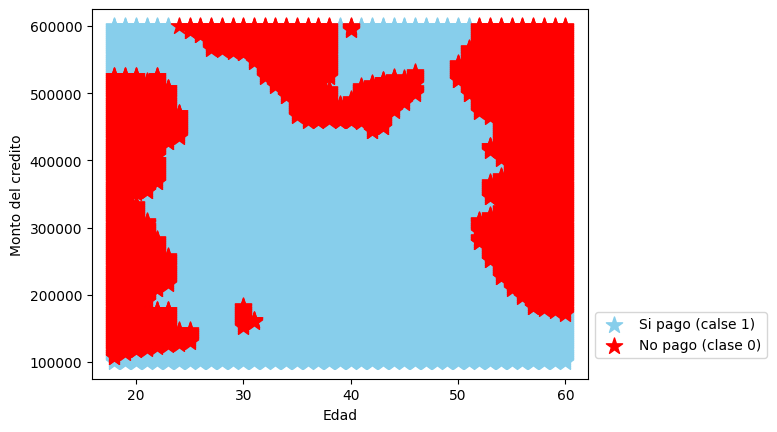

In [8]:
#Datos sinteticos de todos los posibles solicitantes
cliente=np.array([np.arange(100000, 600010, 1000)]*43).reshape(1, -1)
edades=np.array([np.arange(18, 61)]*501).reshape(1, -1)
todos=pd.DataFrame(np.stack((edades,cliente), axis=2)[0],
                   columns=["edad", "credito"])

#Escalar los datos
solicitantes=escalador.transform(todos.values)

#predecir todas las clases
clases_resultantes=clasificador.predict(solicitantes)

#Codigo para graficar

buenos=todos[clases_resultantes==1]
malos=todos[clases_resultantes==0]

plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue",
            label="Si pago (calse 1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red",
            label="No pago (clase 0)")

plt.ylabel("Monto del credito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

##actividad


In [9]:
#crear los modelos con diferentes metricas
clf_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
clf_minkowski = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=3)
clf_hamming = KNeighborsClassifier(n_neighbors=3, metric='hamming')

# Entrenar cada uno
clf_manhattan.fit(datos, clase)
clf_minkowski.fit(datos, clase)
clf_hamming.fit(datos, clase)

KNeighborsClassifier(metric='hamming', n_neighbors=3)

##ejercicio con manhattan


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Clase  [1]
Probabilidades con clase  [[0. 1.]]


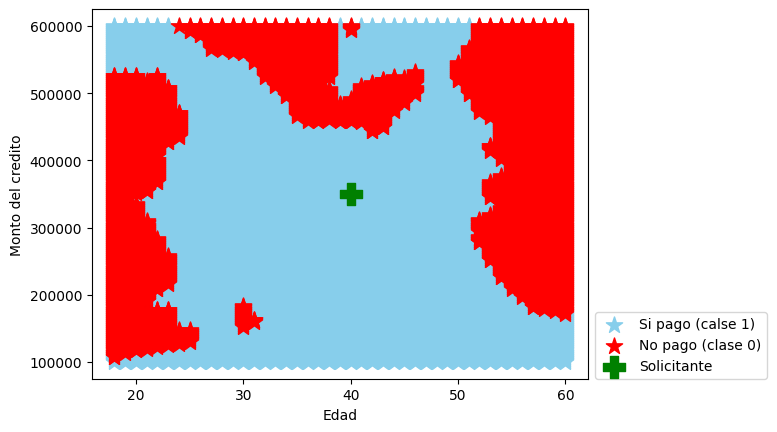

In [10]:
edad=40 #datos artificial para probar el modelo
monto=350000

#escalar datos del nuevo solicitante
solicitante=escalador.transform([[edad, monto]])
print("Clase ", clf_manhattan.predict(solicitante))
print("Probabilidades con clase ", clf_manhattan.predict_proba(solicitante))#calcular clase y probabilidades

#codigo para graficar

plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue",
            label="Si pago (calse 1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red",
            label="No pago (clase 0)")

plt.scatter(edad, monto, marker="P", s=250, color="green", label="Solicitante")
plt.ylabel("Monto del credito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


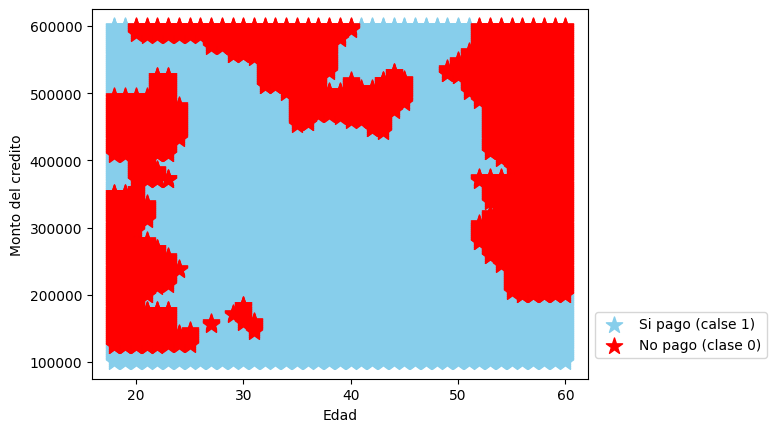

In [11]:
#Datos sinteticos de todos los posibles solicitantes
cliente=np.array([np.arange(100000, 600010, 1000)]*43).reshape(1, -1)
edades=np.array([np.arange(18, 61)]*501).reshape(1, -1)
todos=pd.DataFrame(np.stack((edades,cliente), axis=2)[0],
                   columns=["edad", "credito"])

#Escalar los datos
solicitantes=escalador.transform(todos.values)

#predecir todas las clases
clases_resultantes=clf_manhattan.predict(solicitantes)

#Codigo para graficar

buenos=todos[clases_resultantes==1]
malos=todos[clases_resultantes==0]

plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue",
            label="Si pago (calse 1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red",
            label="No pago (clase 0)")

plt.ylabel("Monto del credito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

##Ejercicio con minkowski

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Clase  [1]
Probabilidades con clase  [[0. 1.]]


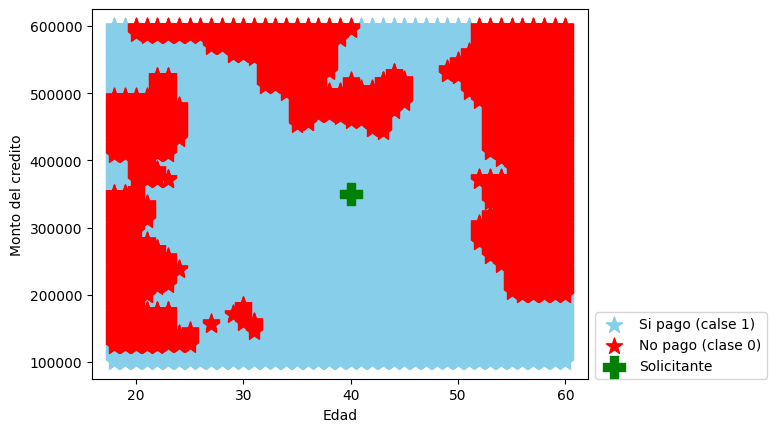

In [12]:
##clf_minkowski

edad=40 #datos artificial para probar el modelo
monto=350000

#escalar datos del nuevo solicitante
solicitante=escalador.transform([[edad, monto]])
print("Clase ", clf_minkowski.predict(solicitante))
print("Probabilidades con clase ", clf_minkowski.predict_proba(solicitante))#calcular clase y probabilidades

#codigo para graficar

plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue",
            label="Si pago (calse 1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red",
            label="No pago (clase 0)")

plt.scatter(edad, monto, marker="P", s=250, color="green", label="Solicitante")
plt.ylabel("Monto del credito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


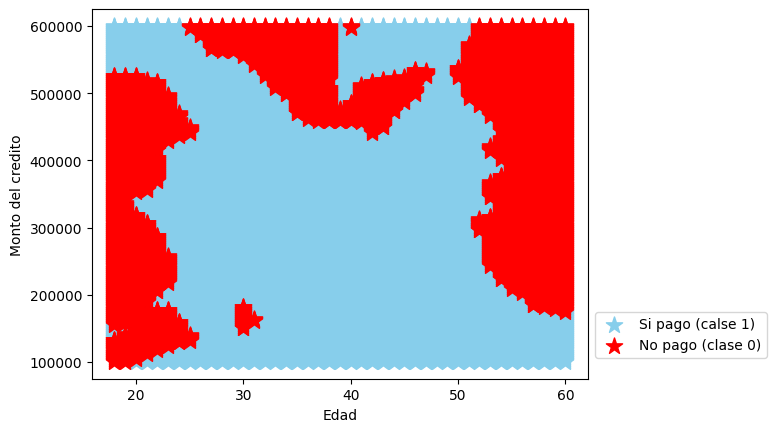

In [13]:
#Datos sinteticos de todos los posibles solicitantes
cliente=np.array([np.arange(100000, 600010, 1000)]*43).reshape(1, -1)
edades=np.array([np.arange(18, 61)]*501).reshape(1, -1)
todos=pd.DataFrame(np.stack((edades,cliente), axis=2)[0],
                   columns=["edad", "credito"])

#Escalar los datos
solicitantes=escalador.transform(todos.values)

#predecir todas las clases
clases_resultantes=clf_minkowski.predict(solicitantes)

#Codigo para graficar

buenos=todos[clases_resultantes==1]
malos=todos[clases_resultantes==0]

plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue",
            label="Si pago (calse 1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red",
            label="No pago (clase 0)")

plt.ylabel("Monto del credito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

##Ejercicio con hamming

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Clase  [1]
Probabilidades con clase  [[0.33333333 0.66666667]]


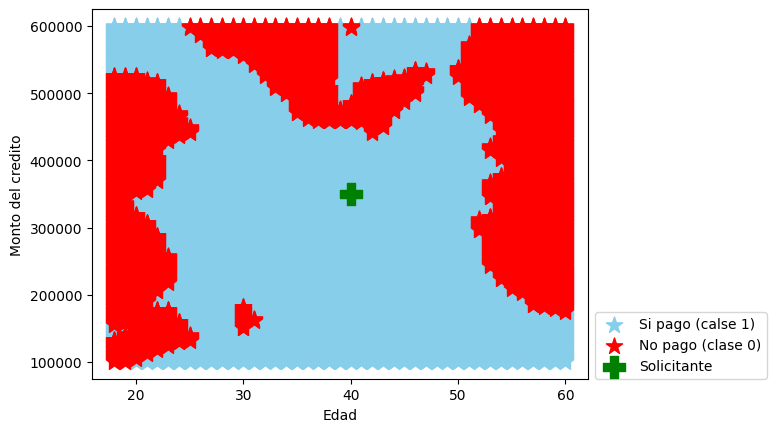

In [14]:
#clf_hamming

edad=40 #datos artificial para probar el modelo
monto=350000

#escalar datos del nuevo solicitante
solicitante=escalador.transform([[edad, monto]])
print("Clase ", clf_hamming.predict(solicitante))
print("Probabilidades con clase ", clf_hamming.predict_proba(solicitante))#calcular clase y probabilidades

#codigo para graficar

plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue",
            label="Si pago (calse 1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red",
            label="No pago (clase 0)")

plt.scatter(edad, monto, marker="P", s=250, color="green", label="Solicitante")
plt.ylabel("Monto del credito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


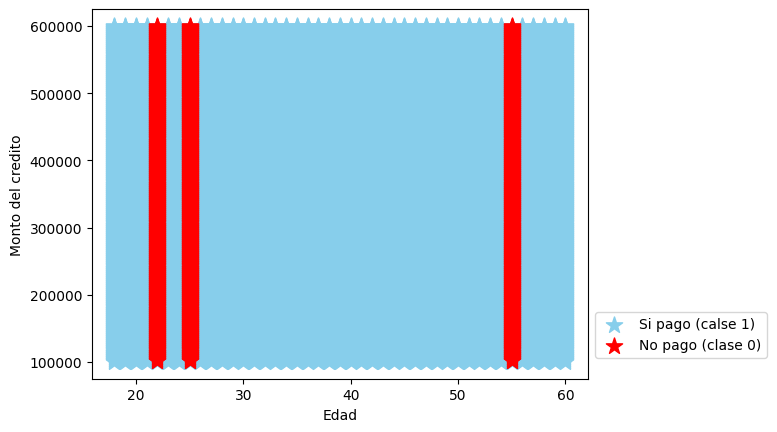

In [15]:
#Datos sinteticos de todos los posibles solicitantes
cliente=np.array([np.arange(100000, 600010, 1000)]*43).reshape(1, -1)
edades=np.array([np.arange(18, 61)]*501).reshape(1, -1)
todos=pd.DataFrame(np.stack((edades,cliente), axis=2)[0],
                   columns=["edad", "credito"])

#Escalar los datos
solicitantes=escalador.transform(todos.values)

#predecir todas las clases
clases_resultantes=clf_hamming.predict(solicitantes)

#Codigo para graficar

buenos=todos[clases_resultantes==1]
malos=todos[clases_resultantes==0]

plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue",
            label="Si pago (calse 1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red",
            label="No pago (clase 0)")

plt.ylabel("Monto del credito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

##Evaluar cual es el mejor modelo

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(datos, clase, test_size=0.3, random_state=42)

# Definir las métricas a evaluar
metricas = {
    'Euclidiana': {'metric': 'euclidean'},
    'Manhattan': {'metric': 'manhattan'},
    'Minkowski': {'metric': 'minkowski', 'p': 3},
    'Hamming': {'metric': 'hamming'}
}

# Diccionario para almacenar resultados
resultados = {}

# Evaluar cada métrica
for nombre, params in metricas.items():
    print(f"\n{'='*60}")
    print(f"MÉTRICA: {nombre}")
    print('='*60)

    # Crear y entrenar el clasificador
    clf = KNeighborsClassifier(n_neighbors=3, **params)
    clf.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = clf.predict(X_test)

    # Calcular accuracy
    accuracy = accuracy_score(y_test, y_pred)
    resultados[nombre] = accuracy

    # Matriz de confusión
    print(f"\nMatriz de Confusión:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Reporte de clasificación
    print(f"\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))

    print(f"\nAccuracy: {accuracy:.4f}")

# Determinar el mejor modelo
print(f"\n{'='*60}")
print("RESUMEN DE RESULTADOS")
print('='*60)
for metrica, acc in resultados.items():
    print(f"{metrica}: {acc:.4f}")

mejor_metrica = max(resultados, key=resultados.get)
print(f"\n🏆 MEJOR MODELO: {mejor_metrica} con accuracy de {resultados[mejor_metrica]:.4f}")


MÉTRICA: Euclidiana

Matriz de Confusión:
[[ 3  6]
 [ 0 51]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.89      1.00      0.94        51

    accuracy                           0.90        60
   macro avg       0.95      0.67      0.72        60
weighted avg       0.91      0.90      0.88        60


Accuracy: 0.9000

MÉTRICA: Manhattan

Matriz de Confusión:
[[ 3  6]
 [ 0 51]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.89      1.00      0.94        51

    accuracy                           0.90        60
   macro avg       0.95      0.67      0.72        60
weighted avg       0.91      0.90      0.88        60


Accuracy: 0.9000

MÉTRICA: Minkowski

Matriz de Confusión:
[[ 3  6]
 [ 0 51]]

Reporte de Clasificación:
              precision    recall  f1-score  

##Ver las metricas en visuales

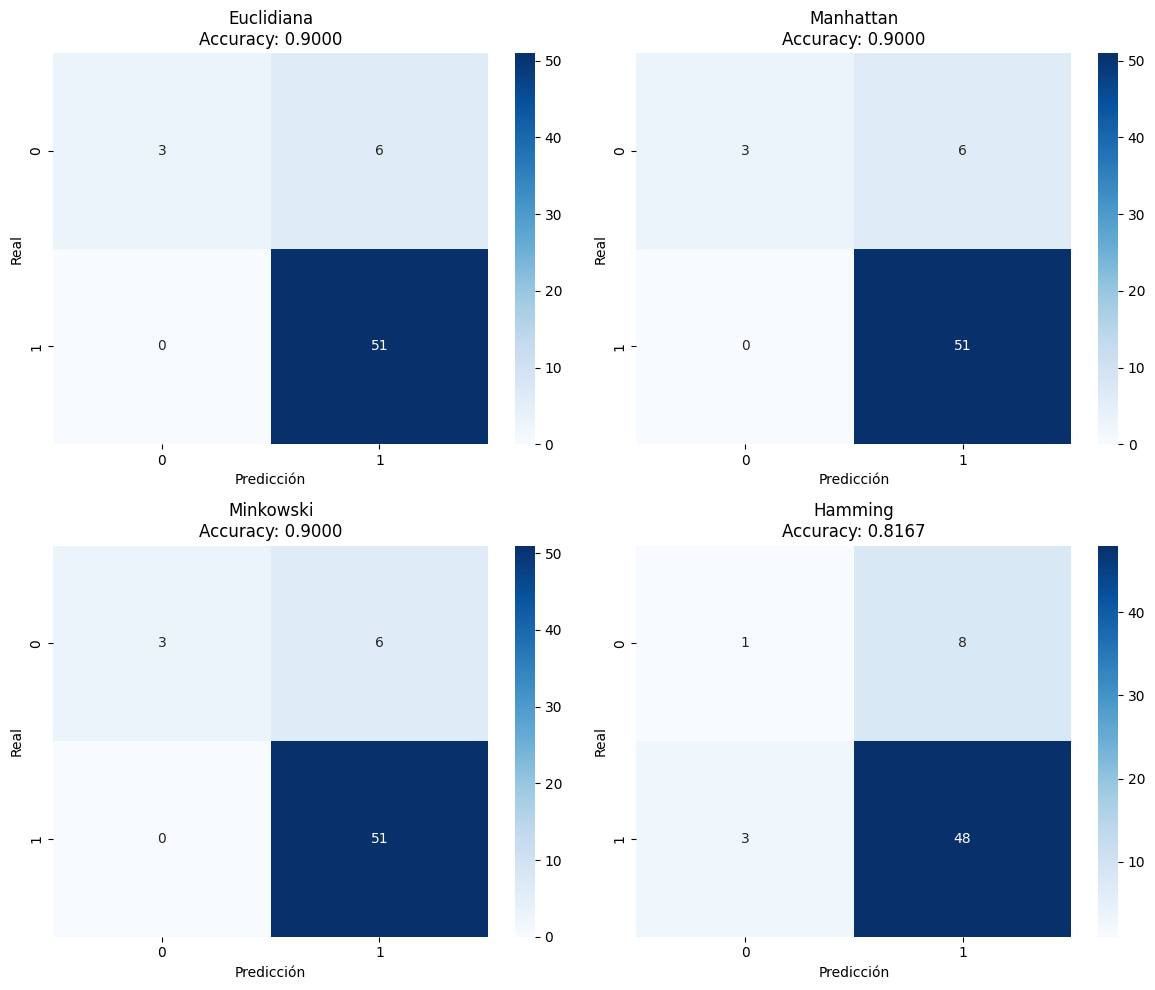

In [17]:
import seaborn as sns

# Crear una figura con subplots para cada métrica
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, (nombre, params) in enumerate(metricas.items()):
    # Crear y entrenar
    clf = KNeighborsClassifier(n_neighbors=3, **params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Visualizar
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{nombre}\nAccuracy: {accuracy_score(y_test, y_pred):.4f}')
    axes[idx].set_xlabel('Predicción')
    axes[idx].set_ylabel('Real')

plt.tight_layout()
plt.show()